In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

## Create a folder for the this HW and change to that dir
%cd drive/MyDrive/cse519_educational_ranking/Datasets

Mounted at /content/drive
/content/drive/MyDrive/cse519_educational_ranking/Datasets


In [ ]:
!pip install -q kaggle
!pip install -q pandas
!pip install -q scikit-learn
!pip install -q numpy
!pip install -q Matplotlib
!pip install -q seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
csv = pd.read_csv("openalex-ipeds-herd-ncses-rankings.csv")

In [ ]:
print(csv)

     Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  unitid  \
0             0             0               0  100663   
1             1             1               1  100706   
2             2             2               2  100751   
3             3             3               3  100858   
4             4             4               4  102049   
..          ...           ...             ...     ...   
537         537           537             537  262129   
538         538           538             538  445188   
539         539           539             539  482149   
540         540           540             540  486840   
541         541           541             541  487524   

                        institution name  year  \
0    University of Alabama at Birmingham  2021   
1    University of Alabama in Huntsville  2021   
2              The University of Alabama  2021   
3                      Auburn University  2021   
4                     Samford University  2021   
..             

## Preprocessing

In [ ]:
# Check which columns have null values more than 350 times
columns_with_more_than_350_nulls = csv.columns[csv.isnull().sum() > 300]

# Print the columns with more than 350 nulls
print(columns_with_more_than_350_nulls)

Index(['DRVF2021.Research expenses as a percent of total core expenses (GASB)',
       'DRVF2021.Research expenses as a percent of total core expenses (for-profit institutions)',
       'DRVF2021.Salaries and wages for research as a percent of total expenses for research (GASB)',
       'DRVF2021.Salaries and wages for research as a percent of total expenses for research (FASB)',
       'DRVF2021.Salaries and wages for research as a percent of total expenses for research (for-profit institutions)',
       'University Name', 'IPEDS ID', 'State', 'rankings_2023',
       'rankings_2022', 'rankings_2021', 'rankings_2020'],
      dtype='object')


In [ ]:
columns_to_drop = ["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.1.1", "institution name", "year",
                   'DRVF2021.Research expenses as a percent of total core expenses (GASB)',
                   'DRVF2021.Research expenses as a percent of total core expenses (FASB)',
                   'DRVF2021.Research expenses as a percent of total core expenses (for-profit institutions)',
                   'DRVF2021.Salaries and wages for research as a percent of total expenses for research (GASB)',
                   'DRVF2021.Salaries and wages for research as a percent of total expenses for research (FASB)',
                   'DRVF2021.Salaries and wages for research as a percent of total expenses for research (for-profit institutions)',
                   'Name', 'Institution Name', 'UnitID_y', 'UNITID', 'UnitID_x']
dropped_csv = csv.drop(columns_to_drop, axis=1)


In [ ]:
# dropped_csv_without_nulls = dropped_csv.drop(columns_with_nulls, axis = 1)

# print(dropped_csv_without_nulls.columns)
dropped_csv.index = dropped_csv["unitid"]
dropped_csv.head()

,unitid,DRVC2021_RV.Doctor's degree - research/scholarship,DRVEF122021_RV.Graduate 12-month unduplicated headcount,"DRVHR2021.Instructional, research and public service FTE",DRVHR2021.Research FTE,EFIA2021_RV.12-month instructional activity credit hours: graduates,"EFIA2021_RV.Estimated full-time equivalent (FTE) graduate enrollment, 2020-21","EFIA2021_RV.Reported full-time equivalent (FTE) graduate enrollment, 2020-21",Unnamed: 0.1.1.1,display_name,...,2014_Doctorate Recipients,2013_Doctorate Recipients,2012_Doctorate Recipients,University Name,IPEDS ID,State,rankings_2023,rankings_2022,rankings_2021,rankings_2020
unitid,,,,,,,,,,,,,,,,,,,,,
100663,100663,149.0,10648.0,2749.0,0.0,171896.0,7162.0,7162.0,99,University of Alabama at Birmingham,...,175,159,179,University of Alabama-Birmingham,100663.0,AL,137.0,148.0,NaN,NaN
100706,100706,40.0,2432.0,417.0,0.0,29123.0,1213.0,1213.0,111,University of Alabama in Huntsville,...,30,27,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100751,100751,203.0,7381.0,1785.0,72.0,108368.0,4515.0,4515.0,120,University of Alabama at Birmingham,...,167,182,142,University of Alabama,100751.0,AL,137.0,148.0,NaN,153.0
100858,100858,251.0,7118.0,1807.0,63.0,95648.0,3985.0,3985.0,149,Auburn University,...,250,236,248,Auburn University,100858.0,AL,97.0,99.0,NaN,107.0
102049,102049,46.0,2476.0,413.0,0.0,24134.0,1006.0,1006.0,436,Samford University,...,NaN,NaN,NaN,Samford University,102049.0,AL,127.0,136.0,NaN,NaN


In [ ]:
# not considering
columns_to_consider_2021 = ['unitid', 'DRVC2021_RV.Doctor\'s degree - research/scholarship',
       'DRVEF122021_RV.Graduate 12-month unduplicated headcount',
       'DRVHR2021.Instructional, research and public service FTE',
       'DRVHR2021.Research FTE',
       'EFIA2021_RV.12-month instructional activity credit hours: graduates',
       'EFIA2021_RV.Estimated full-time equivalent (FTE) graduate enrollment, 2020-21',
       'EFIA2021_RV.Reported full-time equivalent (FTE) graduate enrollment, 2020-21',
       'display_name', 'id', 'works_count', 'cited_by_count', 'h_index',
       'i10_index', 'city', '2yr_mean_citedness',
       'repositories_count', 'associated_institutions_count', 'works_count_2021', 'cited_by_count_2021',
        'R&D Expenditures by Detailed Funding Source',
       'R&D Expenditures by Broad Field and Fed and Nonfed Sources',
       'R&D Expenditures Passed Through to Subrecipients',
       'R&D Expenditures Received as a Subrecipient from Other Sources', '2021_Doctorate Recipients', 'rankings_2022']

In [ ]:
print(dropped_csv_2021_data.columns)

Index(['unitid', 'DRVC2021_RV.Doctor's degree - research/scholarship',
       'DRVEF122021_RV.Graduate 12-month unduplicated headcount',
       'DRVHR2021.Instructional, research and public service FTE',
       'DRVHR2021.Research FTE',
       'EFIA2021_RV.12-month instructional activity credit hours: graduates',
       'EFIA2021_RV.Estimated full-time equivalent (FTE) graduate enrollment, 2020-21',
       'EFIA2021_RV.Reported full-time equivalent (FTE) graduate enrollment, 2020-21',
       'display_name', 'id', 'works_count', 'cited_by_count', 'h_index',
       'i10_index', 'city', '2yr_mean_citedness', 'repositories_count',
       'associated_institutions_count', 'works_count_2021',
       'cited_by_count_2021', 'R&D Expenditures by Detailed Funding Source',
       'R&D Expenditures by Broad Field and Fed and Nonfed Sources',
       'R&D Expenditures Passed Through to Subrecipients',
       'R&D Expenditures Received as a Subrecipient from Other Sources',
       '2021_Doctorate Reci

In [ ]:
dropped_csv_2021_data = dropped_csv[columns_to_consider_2021]

print(dropped_csv_2021_data.columns)

Index(['unitid', 'DRVC2021_RV.Doctor's degree - research/scholarship',
       'DRVEF122021_RV.Graduate 12-month unduplicated headcount',
       'DRVHR2021.Instructional, research and public service FTE',
       'DRVHR2021.Research FTE',
       'EFIA2021_RV.12-month instructional activity credit hours: graduates',
       'EFIA2021_RV.Estimated full-time equivalent (FTE) graduate enrollment, 2020-21',
       'EFIA2021_RV.Reported full-time equivalent (FTE) graduate enrollment, 2020-21',
       'display_name', 'id', 'works_count', 'cited_by_count', 'h_index',
       'i10_index', 'city', '2yr_mean_citedness', 'repositories_count',
       'associated_institutions_count', 'works_count_2021',
       'cited_by_count_2021', 'R&D Expenditures by Detailed Funding Source',
       'R&D Expenditures by Broad Field and Fed and Nonfed Sources',
       'R&D Expenditures Passed Through to Subrecipients',
       'R&D Expenditures Received as a Subrecipient from Other Sources',
       '2021_Doctorate Reci

In [ ]:
dropped_csv_2021_data.replace(',','', regex=True, inplace=True)
dropped_csv_2021_data.replace('-','0', regex=True, inplace=True)
columns_to_convert = ['R&D Expenditures by Detailed Funding Source',
       'R&D Expenditures by Broad Field and Fed and Nonfed Sources',
       'R&D Expenditures Passed Through to Subrecipients',
       'R&D Expenditures Received as a Subrecipient from Other Sources',
       '2021_Doctorate Recipients']
for col in columns_to_convert:
  dropped_csv_2021_data[col].fillna(0)
  dropped_csv_2021_data[col] = dropped_csv_2021_data[col].astype(str).astype(float)

dropped_csv_2021_data.dtypes

<ipython-input-10-bb76fb62b414>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_csv_2021_data.replace(',','', regex=True, inplace=True)
<ipython-input-10-bb76fb62b414>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_csv_2021_data.replace('-','0', regex=True, inplace=True)
<ipython-input-10-bb76fb62b414>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_c

unitid                                                                             int64
DRVC2021_RV.Doctor's degree - research/scholarship                               float64
DRVEF122021_RV.Graduate 12-month unduplicated headcount                          float64
DRVHR2021.Instructional, research and public service FTE                         float64
DRVHR2021.Research FTE                                                           float64
EFIA2021_RV.12-month instructional activity credit hours: graduates              float64
EFIA2021_RV.Estimated full-time equivalent (FTE) graduate enrollment, 2020-21    float64
EFIA2021_RV.Reported full-time equivalent (FTE) graduate enrollment, 2020-21     float64
display_name                                                                      object
id                                                                                object
works_count                                                                        int64
cited_by_count       

In [ ]:
columns_with_nulls = dropped_csv_2021_data.columns[dropped_csv_2021_data.isnull().sum() > 0]

for col in columns_with_nulls:
    print(f"Column {col} has {dropped_csv_2021_data[col].isnull().sum()} null values")

Column DRVC2021_RV.Doctor's degree - research/scholarship has 1 null values
Column DRVEF122021_RV.Graduate 12-month unduplicated headcount has 1 null values
Column DRVHR2021.Instructional, research and public service FTE has 2 null values
Column DRVHR2021.Research FTE has 2 null values
Column EFIA2021_RV.12-month instructional activity credit hours: graduates has 72 null values
Column EFIA2021_RV.Estimated full-time equivalent (FTE) graduate enrollment, 2020-21 has 72 null values
Column EFIA2021_RV.Reported full-time equivalent (FTE) graduate enrollment, 2020-21 has 72 null values
Column R&D Expenditures by Detailed Funding Source has 109 null values
Column R&D Expenditures by Broad Field and Fed and Nonfed Sources has 109 null values
Column R&D Expenditures Passed Through to Subrecipients has 109 null values
Column R&D Expenditures Received as a Subrecipient from Other Sources has 109 null values
Column 2021_Doctorate Recipients has 216 null values
Column rankings_2022 has 384 null va

In [ ]:
# dropped_csv_2021_data = dropped_csv_2021_data.drop('region', axis =1)
# print(dropped_csv_2021_data)

In [ ]:
# dropped_csv.to_csv('dropped_columns-openalex-ipeds-herd-ncses.csv')

# Doctorate Data Analysis

In [ ]:
# df for all Doctorate Recipients
doctorates_df = dropped_csv.filter(regex="Doctorate Recipients")
doctorates_df.replace(',','', regex=True, inplace=True)
doctorates_df.replace('-','0', regex=True, inplace=True)
for col in doctorates_df.columns:
  doctorates_df[col] = doctorates_df[col].astype(str).astype(float)
# Make some interesting plot
print(doctorates_df.dtypes)
doctorates_df["Total Doctorates in 10 years"] = doctorates_df.sum(axis = 1)
doctorates_df["display_name"] = dropped_csv["display_name"]
# sns.lineplot(doctorates_df,x="display_name", y="Total Doctorates in 10 years")
doctorates_df = doctorates_df.sort_values("Total Doctorates in 10 years", ascending=False)
doctorates_df.head()

2022_Doctorate Recipients    float64
2021_Doctorate Recipients    float64
2020_Doctorate Recipients    float64
2019_Doctorate Recipients    float64
2018_Doctorate Recipients    float64
2017_Doctorate Recipients    float64
2016_Doctorate Recipients    float64
2015_Doctorate Recipients    float64
2014_Doctorate Recipients    float64
2013_Doctorate Recipients    float64
2012_Doctorate Recipients    float64
dtype: object


<ipython-input-11-247a7b1b3032>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doctorates_df.replace(',','', regex=True, inplace=True)
<ipython-input-11-247a7b1b3032>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doctorates_df.replace('-','0', regex=True, inplace=True)
<ipython-input-11-247a7b1b3032>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doctorates_df[col] = docto

,2022_Doctorate Recipients,2021_Doctorate Recipients,2020_Doctorate Recipients,2019_Doctorate Recipients,2018_Doctorate Recipients,2017_Doctorate Recipients,2016_Doctorate Recipients,2015_Doctorate Recipients,2014_Doctorate Recipients,2013_Doctorate Recipients,2012_Doctorate Recipients,Total Doctorates in 10 years,display_name
unitid,,,,,,,,,,,,,
110635,830.0,787.0,796.0,864.0,852.0,798.0,793.0,812.0,917.0,913.0,865.0,9227.0,"University of California, Berkeley"
170976,861.0,793.0,846.0,801.0,853.0,778.0,818.0,851.0,850.0,853.0,828.0,9132.0,University of Michigan–Ann Arbor
228778,741.0,667.0,744.0,801.0,762.0,795.0,849.0,841.0,851.0,798.0,807.0,8656.0,The University of Texas at Austin
240444,753.0,664.0,724.0,780.0,770.0,842.0,823.0,836.0,783.0,735.0,793.0,8503.0,University of Wisconsin–Madison
145637,824.0,662.0,820.0,759.0,766.0,782.0,677.0,782.0,755.0,757.0,808.0,8392.0,University of Illinois Urbana-Champaign


<Axes: xlabel='Total Doctorates in 10 years', ylabel='2021_Doctorate Recipients'>

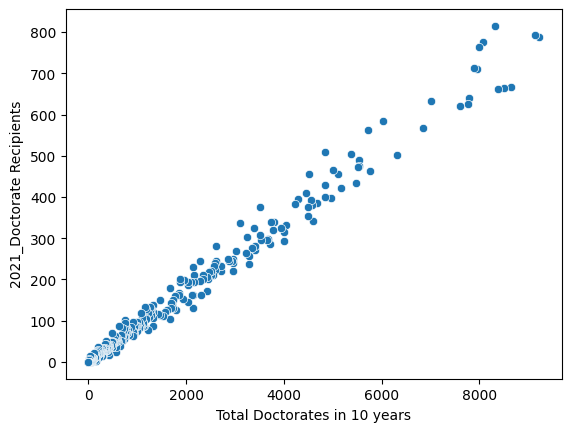

In [ ]:
sns.scatterplot(doctorates_df,x="Total Doctorates in 10 years", y="2021_Doctorate Recipients")

<ipython-input-112-e6becd7c9b9c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(doctorates_df.corr());


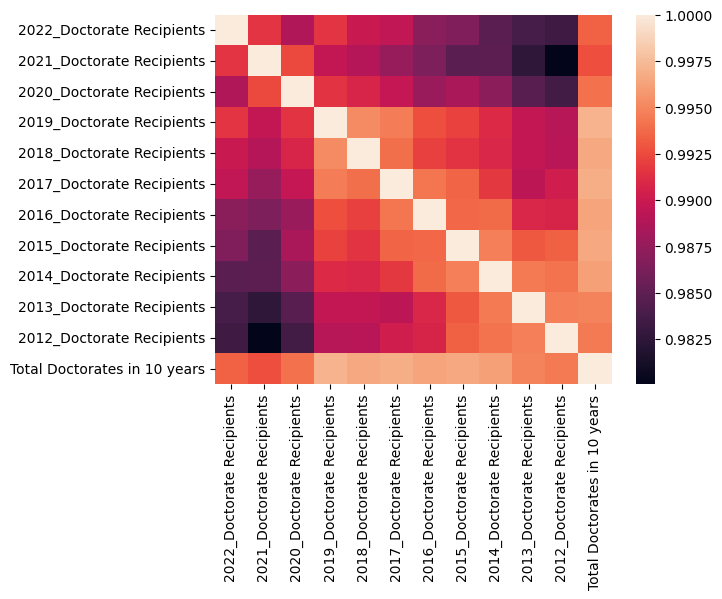

In [ ]:
sns.heatmap(doctorates_df.corr());

<Axes: xlabel='display_name', ylabel='Total Doctorates in 10 years'>

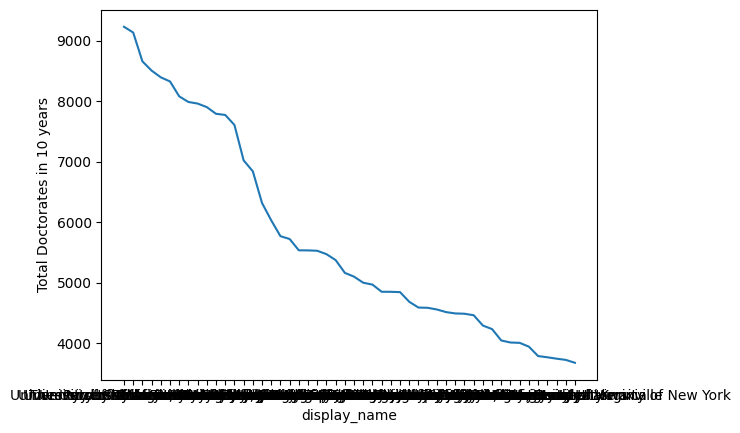

In [ ]:
sns.lineplot(doctorates_df[:50],x="display_name", y="Total Doctorates in 10 years")

# HERD Data corr plots

In [ ]:
dropped_csv_2021_data["Total R&D Expenditure"] = dropped_csv_2021_data[['R&D Expenditures by Detailed Funding Source',
       'R&D Expenditures by Broad Field and Fed and Nonfed Sources',
       'R&D Expenditures Passed Through to Subrecipients',
       'R&D Expenditures Received as a Subrecipient from Other Sources']].sum(axis=1)


<ipython-input-12-dffade2a47bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_csv_2021_data["Total R&D Expenditure"] = dropped_csv_2021_data[['R&D Expenditures by Detailed Funding Source',


In [ ]:
dropped_csv_2021_data.head()

,unitid,DRVC2021_RV.Doctor's degree - research/scholarship,DRVEF122021_RV.Graduate 12-month unduplicated headcount,"DRVHR2021.Instructional, research and public service FTE",DRVHR2021.Research FTE,EFIA2021_RV.12-month instructional activity credit hours: graduates,"EFIA2021_RV.Estimated full-time equivalent (FTE) graduate enrollment, 2020-21","EFIA2021_RV.Reported full-time equivalent (FTE) graduate enrollment, 2020-21",display_name,id,...,repositories_count,associated_institutions_count,works_count_2021,cited_by_count_2021,R&D Expenditures by Detailed Funding Source,R&D Expenditures by Broad Field and Fed and Nonfed Sources,R&D Expenditures Passed Through to Subrecipients,R&D Expenditures Received as a Subrecipient from Other Sources,2021_Doctorate Recipients,Total R&D Expenditure
unitid,,,,,,,,,,,,,,,,,,,,,
100663,100663,149.0,10648.0,2749.0,0.0,171896.0,7162.0,7162.0,University of Alabama at Birmingham,https://openalex.org/I32389192,...,0,4,6418,301157,644330000.0,644330000.0,73982000.0,82435000.0,141.0,1.445077e+09
100706,100706,40.0,2432.0,417.0,0.0,29123.0,1213.0,1213.0,University of Alabama in Huntsville,https://openalex.org/I82495205,...,0,3,756,24764,149792000.0,149792000.0,4484000.0,49738000.0,40.0,3.538060e+08
100751,100751,203.0,7381.0,1785.0,72.0,108368.0,4515.0,4515.0,University of Alabama at Birmingham,https://openalex.org/I32389192,...,0,4,6418,301157,129509000.0,129509000.0,5253000.0,24356000.0,152.0,2.886270e+08
100858,100858,251.0,7118.0,1807.0,63.0,95648.0,3985.0,3985.0,Auburn University,https://openalex.org/I82497590,...,0,2,3058,101638,266374000.0,266374000.0,8442000.0,41233000.0,250.0,5.824230e+08
102049,102049,46.0,2476.0,413.0,0.0,24134.0,1006.0,1006.0,Samford University,https://openalex.org/I83321563,...,0,0,146,2493,NaN,NaN,NaN,NaN,NaN,0.000000e+00


<Axes: xlabel='h_index', ylabel='Total R&D Expenditure'>

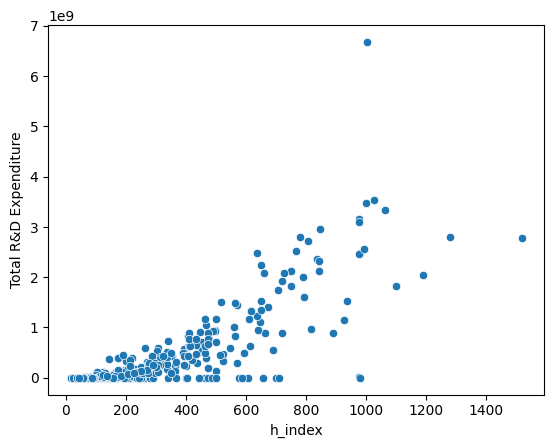

In [ ]:
sns.scatterplot(dropped_csv_2021_data, x="h_index", y="Total R&D Expenditure")

<Axes: xlabel='works_count', ylabel='Total R&D Expenditure'>

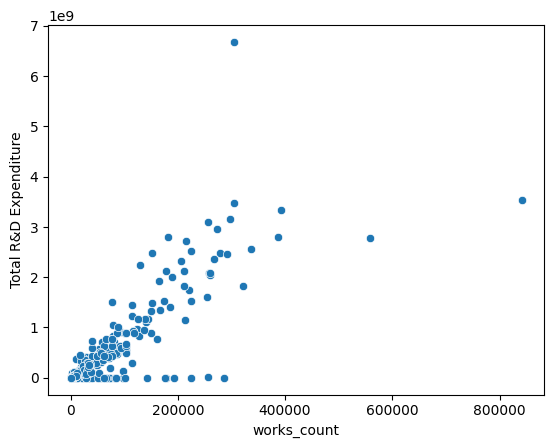

In [ ]:
sns.scatterplot(dropped_csv_2021_data, x="works_count", y="Total R&D Expenditure")

<ipython-input-118-61996176da98>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dropped_csv_2021_data.corr());


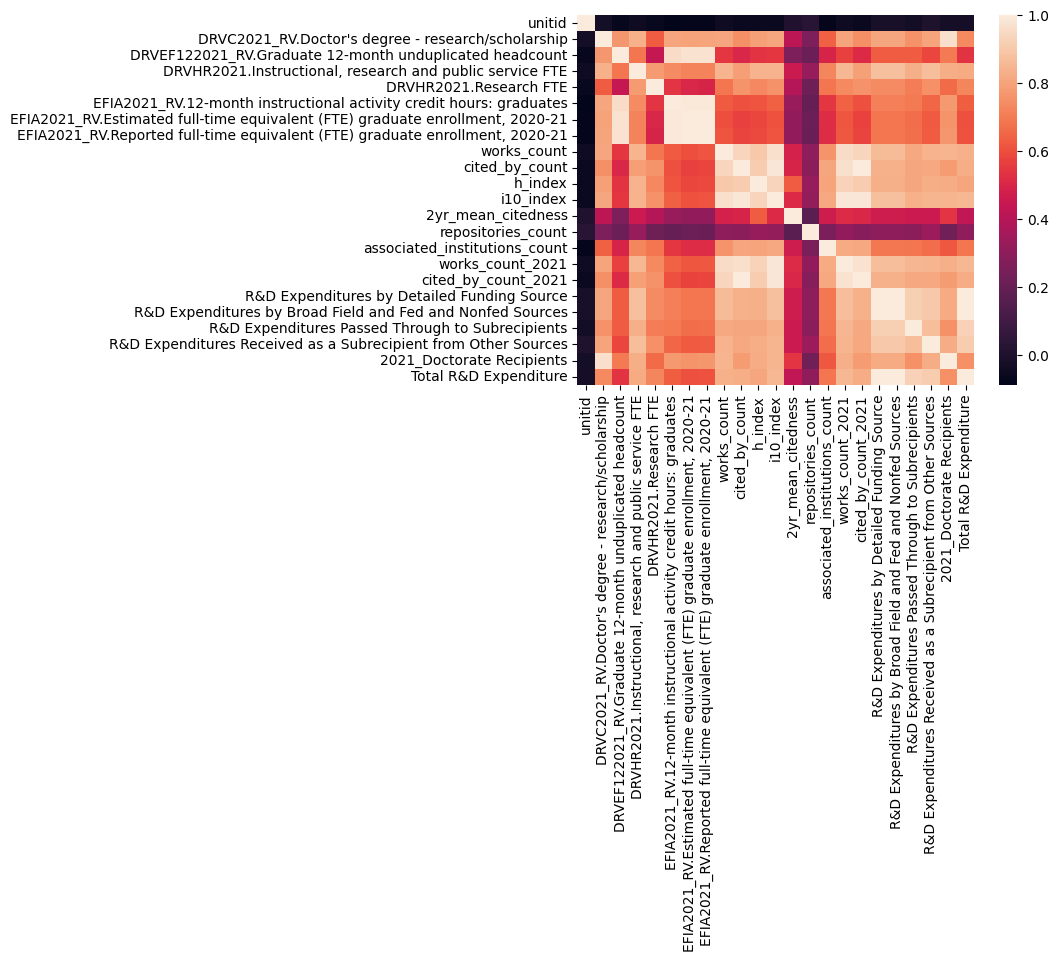

In [ ]:
sns.heatmap(dropped_csv_2021_data.corr());

In [ ]:
# Analyze highly correlated pairs
threshold = 0.8  # Adjust threshold based on your requirements
correlation_matrix = dropped_csv_2021_data.corr()
# Iterate through the correlation matrix to identify highly correlated pairs
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold and abs(correlation_matrix.iloc[i, j]) < 0.9:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            highly_correlated_pairs.append(pair)

# Print highly correlated pairs and their correlation values
print("Highly Correlated Pairs (|Correlation| > {}):".format(threshold))
for pair in highly_correlated_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]}")


Highly Correlated Pairs (|Correlation| > 0.8):
DRVHR2021.Instructional, research and public service FTE - DRVC2021_RV.Doctor's degree - research/scholarship: 0.8379440779144779
EFIA2021_RV.12-month instructional activity credit hours: graduates - DRVC2021_RV.Doctor's degree - research/scholarship: 0.8079606346133201
EFIA2021_RV.Reported full-time equivalent (FTE) graduate enrollment, 2020-21 - DRVC2021_RV.Doctor's degree - research/scholarship: 0.8024280883846227
works_count - DRVC2021_RV.Doctor's degree - research/scholarship: 0.805689746220554
works_count - DRVHR2021.Instructional, research and public service FTE: 0.8445731051433382
h_index - DRVHR2021.Instructional, research and public service FTE: 0.8395976379991885
i10_index - DRVC2021_RV.Doctor's degree - research/scholarship: 0.8084988171972836
i10_index - DRVHR2021.Instructional, research and public service FTE: 0.8412393047813457
associated_institutions_count - cited_by_count: 0.8080519145331748
associated_institutions_count -

<ipython-input-119-0b0035ca0c31>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dropped_csv_2021_data.corr()


# Skiena


In [ ]:
skiena_csv = pd.read_csv("skiena_ranking_data.csv")

In [ ]:
skiena_csv.index = skiena_csv["UNITID"]

In [ ]:
skiena_csv.index

Int64Index([223232, 153603, 182281, 202763, 186380, 188429, 239628, 110608,
            182290, 215062,
            ...
            237525, 198613, 106458, 110556, 110565, 196592, 262129, 174066,
            110583, 129020],
           dtype='int64', name='UNITID', length=544)

In [ ]:
dropped_csv_2021_data.index = dropped_csv_2021_data["unitid"]
dropped_csv_2021_data.index

Int64Index([100663, 100706, 100751, 100858, 102049, 102094, 102234, 102614,
            104151, 104179,
            ...
            240444, 240453, 240727, 243744, 243780, 262129, 445188, 482149,
            486840, 487524],
           dtype='int64', name='unitid', length=542)

In [ ]:
# Combine the dfs
combined_df = dropped_csv_2021_data.join(skiena_csv)

In [ ]:
combined_df.head()

,unitid,DRVC2021_RV.Doctor's degree - research/scholarship,DRVEF122021_RV.Graduate 12-month unduplicated headcount,"DRVHR2021.Instructional, research and public service FTE",DRVHR2021.Research FTE,EFIA2021_RV.12-month instructional activity credit hours: graduates,"EFIA2021_RV.Estimated full-time equivalent (FTE) graduate enrollment, 2020-21","EFIA2021_RV.Reported full-time equivalent (FTE) graduate enrollment, 2020-21",display_name,id,...,Wiki Length,Wiki Page Rank,CONTROL,Carnegie Classification,Followers on Twitter,Institutional,Name,Research and Scholarship,Social Good,State
unitid,,,,,,,,,,,,,,,,,,,,,
100663,100663,149.0,10648.0,2749.0,0.0,171896.0,7162.0,7162.0,University of Alabama at Birmingham,https://openalex.org/I32389192,...,3196,19.087231,1,15,31573.0,211,Univ. of Alabama at Birmingham,65,272,AL
100706,100706,40.0,2432.0,417.0,0.0,29123.0,1213.0,1213.0,University of Alabama in Huntsville,https://openalex.org/I82495205,...,1886,8.090462,1,16,11079.0,396,Univ. of Alabama in Huntsville,284,183,AL
100751,100751,203.0,7381.0,1785.0,72.0,108368.0,4515.0,4515.0,University of Alabama at Birmingham,https://openalex.org/I32389192,...,6410,79.506943,1,15,190229.0,69,The University of Alabama,114,374,AL
100858,100858,251.0,7118.0,1807.0,63.0,95648.0,3985.0,3985.0,Auburn University,https://openalex.org/I82497590,...,7635,54.654232,1,15,137275.0,121,Auburn University,96,309,AL
102049,102049,46.0,2476.0,413.0,0.0,24134.0,1006.0,1006.0,Samford University,https://openalex.org/I83321563,...,2335,6.495997,2,17,13064.0,276,Samford University,405,521,AL


## Plots

In [ ]:
!pip install plotly-express

<ipython-input-147-d44d8e7d408f>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='State')

In [ ]:
import plotly

# import plotly.express module
# this module is used to create entire figures at once
import plotly.express as px
 state_recipent_list = combined_df.groupby("State").sum()["2021_Doctorate Recipients"]

# create figure
fig = px.choropleth(state_recipent_list, locations=state_recipent_list.index,
                    locationmode="USA-states", color='2021_Doctorate Recipients', scope="usa",color_continuous_scale='matter',title="Number of Doctorate Recipents state-wise grouped by university's State")
# fig.title("Number of Doctorate Recipents state-wise grouped by university's State")
fig.update_layout(
    autosize=False,
    width=700,
    height=400,
    # fontsize=10
)
fig.show()

In [ ]:
state_recipent_list = combined_df.groupby("State").sum()["h_index"]

import plotly

# import plotly.express module
# this module is used to create entire figures at once
import plotly.express as px

# create figure
fig = px.choropleth(state_recipent_list, locations=state_recipent_list.index,
                    locationmode="USA-states", color='h_index', scope="usa",color_continuous_scale='matter',title="Number of Doctorate Recipents state-wise grouped by university's State")
# fig.title("Number of Doctorate Recipents state-wise grouped by university's State")
fig.update_layout(
    autosize=False,
    width=700,
    height=400,
    # fontsize=10
)
fig.show()

<ipython-input-170-72f895b7fa76>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



# Sam

In [ ]:
df = dropped_csv_2021_data

In [ ]:
df.to_csv('dump_for_dumb.csv')

In [ ]:
print(df)

        unitid  DRVC2021_RV.Doctor's degree - research/scholarship  \
unitid                                                               
100663  100663                                              149.0    
100706  100706                                               40.0    
100751  100751                                              203.0    
100858  100858                                              251.0    
102049  102049                                               46.0    
...        ...                                                ...    
262129  262129                                                0.0    
445188  445188                                               56.0    
482149  482149                                               33.0    
486840  486840                                               38.0    
487524  487524                                                0.0    

        DRVEF122021_RV.Graduate 12-month unduplicated headcount  \
unitid                

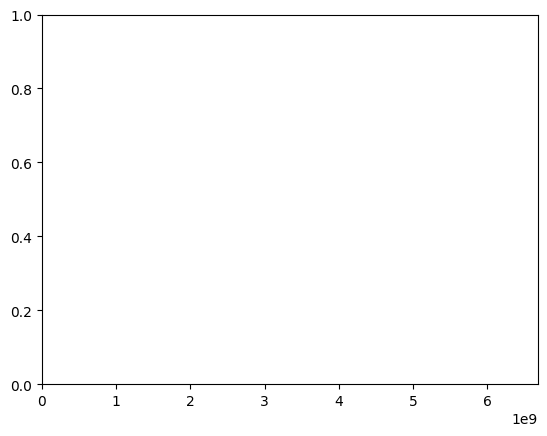

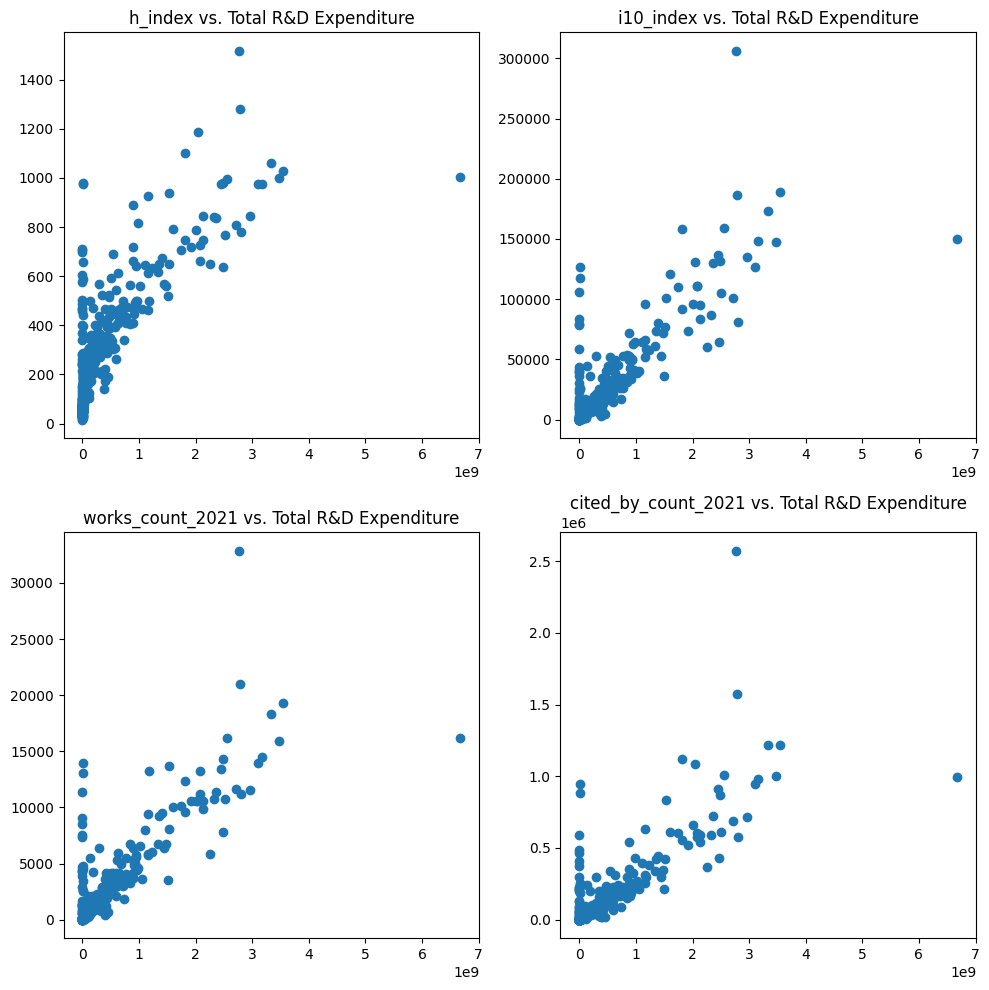

In [ ]:
import matplotlib.pyplot as plt

df = dropped_csv_2021_data
# Get the max and min values of each column
max_h_index = df["h_index"].max()
min_h_index = df["h_index"].min()
max_i10_index = df["i10_index"].max()
min_i10_index = df["i10_index"].min()
max_works_count_2021 = df["works_count_2021"].max()
min_works_count_2021 = df["works_count_2021"].min()
max_cited_by_count_2021 = df["cited_by_count_2021"].max()
min_cited_by_count_2021 = df["cited_by_count_2021"].min()
max_total_rd_expenditure = df["Total R&D Expenditure"].max()
min_total_rd_expenditure = df["Total R&D Expenditure"].min()

# Set the range of the x and y coordinates accordingly
plt.xlim(min_total_rd_expenditure - 500, max_total_rd_expenditure + 500)

# Create multiple scatterplots on the same figure
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Scatterplot of h_index vs. Total R&D Expenditure
axs[0, 0].scatter(df["Total R&D Expenditure"], df["h_index"])
axs[0, 0].set_title("h_index vs. Total R&D Expenditure")

# Scatterplot of i10_index vs. Total R&D Expenditure
axs[0, 1].scatter(df["Total R&D Expenditure"], df["i10_index"])
axs[0, 1].set_title("i10_index vs. Total R&D Expenditure")

# Scatterplot of works_count_2021 vs. Total R&D Expenditure
axs[1, 0].scatter(df["Total R&D Expenditure"], df["works_count_2021"])
axs[1, 0].set_title("works_count_2021 vs. Total R&D Expenditure")

# Scatterplot of cited_by_count_2021 vs. Total R&D Expenditure
axs[1, 1].scatter(df["Total R&D Expenditure"], df["cited_by_count_2021"])
axs[1, 1].set_title("cited_by_count_2021 vs. Total R&D Expenditure")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

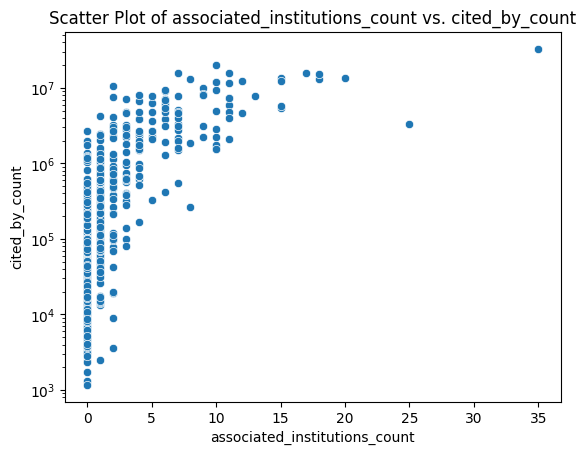

In [ ]:
import seaborn as sns
# Create a scatter plot using seaborn
sns.scatterplot(x="associated_institutions_count", y="cited_by_count", data=df)
plt.xlabel("associated_institutions_count")
plt.ylabel("cited_by_count")
plt.title("Scatter Plot of associated_institutions_count vs. cited_by_count")

# Set the y-axis to logarithmic scale
plt.yscale('log')

plt.show()

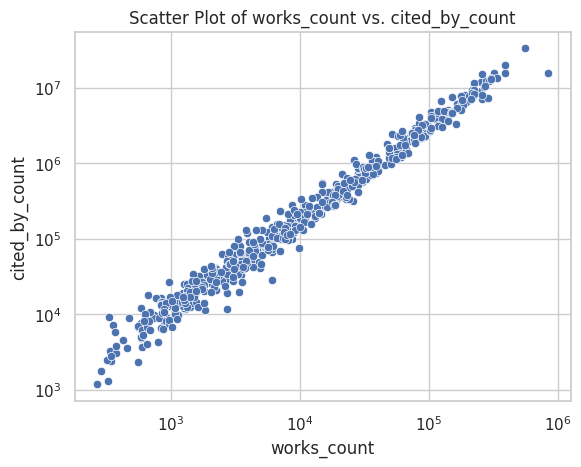

In [ ]:
# Create a scatter plot using seaborn
sns.scatterplot(x="works_count", y="cited_by_count", data=df)
plt.xlabel("works_count")
plt.ylabel("cited_by_count")
plt.title("Scatter Plot of works_count vs. cited_by_count")

# Set the y-axis to logarithmic scale
plt.yscale('log')
plt.xscale('log')

plt.show()


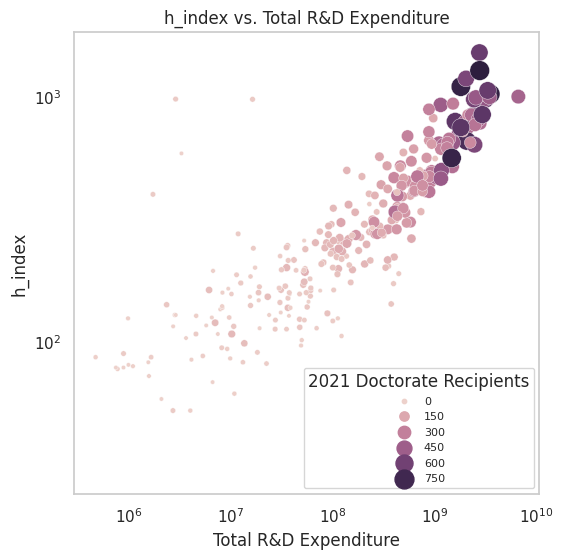

In [ ]:

# Create the scatter plot
fig, ax = plt.subplots(figsize=(6, 6))
scatterplot = sns.scatterplot(x="Total R&D Expenditure", y="h_index", size="2021_Doctorate Recipients", hue="2021_Doctorate Recipients", sizes=(10, 200), c="#A00A7F", data=df)

ax.grid(False)
plt.xlabel("Total R&D Expenditure")
plt.ylabel("h_index")
plt.title("h_index vs. Total R&D Expenditure")
plt.yscale('log')
plt.xscale('log')

plt.legend(title="2021 Doctorate Recipients", fontsize='small', prop={'size': 8})


# plt.tight_layout()
plt.show()

In [ ]:
print(df.columns)

Index(['unitid', 'DRVC2021_RV.Doctor's degree - research/scholarship',
       'DRVEF122021_RV.Graduate 12-month unduplicated headcount',
       'DRVHR2021.Instructional, research and public service FTE',
       'DRVHR2021.Research FTE',
       'EFIA2021_RV.12-month instructional activity credit hours: graduates',
       'EFIA2021_RV.Estimated full-time equivalent (FTE) graduate enrollment, 2020-21',
       'EFIA2021_RV.Reported full-time equivalent (FTE) graduate enrollment, 2020-21',
       'display_name', 'id', 'works_count', 'cited_by_count', 'h_index',
       'i10_index', 'city', '2yr_mean_citedness', 'repositories_count',
       'associated_institutions_count', 'works_count_2021',
       'cited_by_count_2021', 'R&D Expenditures by Detailed Funding Source',
       'R&D Expenditures by Broad Field and Fed and Nonfed Sources',
       'R&D Expenditures Passed Through to Subrecipients',
       'R&D Expenditures Received as a Subrecipient from Other Sources',
       '2021_Doctorate Reci

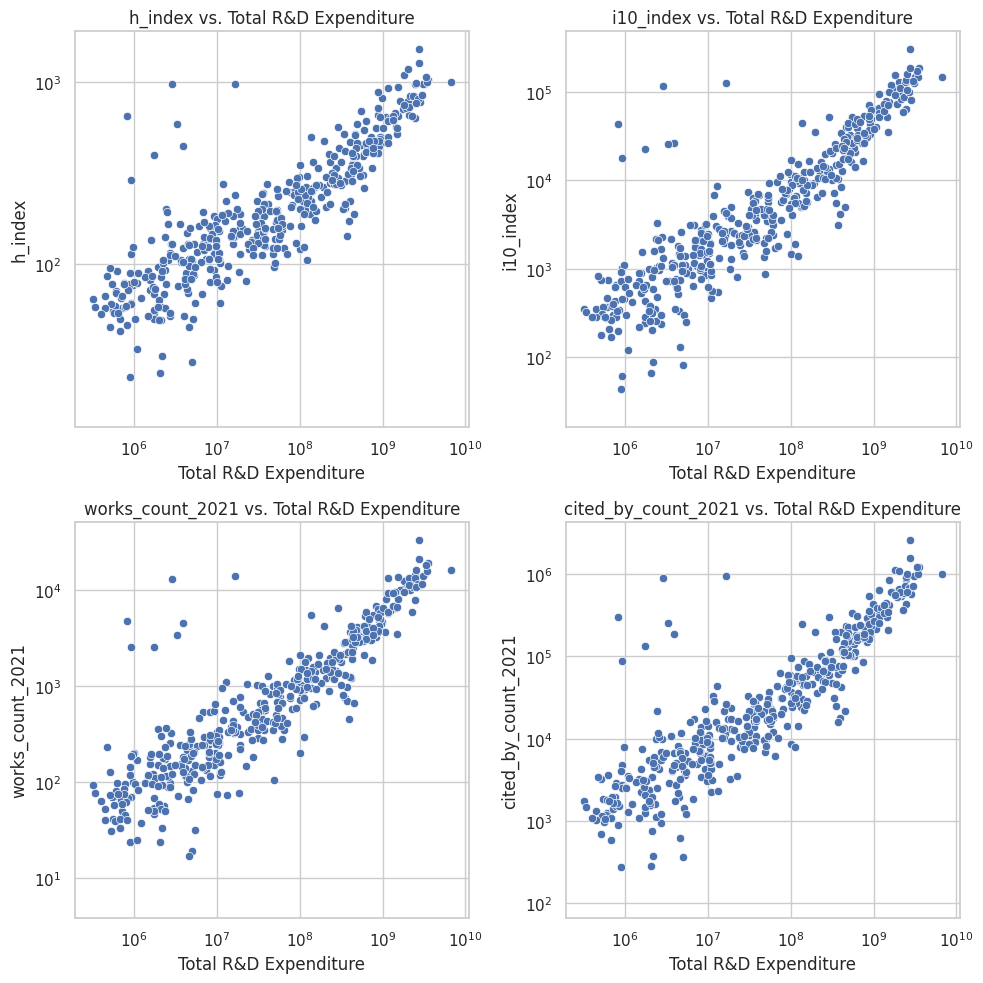

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for Seaborn
sns.set(style="whitegrid")

# Create multiple scatterplots on the same figure
fig, axs = plt.subplots(1, 1, figsize=(10, 10))

# Scatterplot of h_index vs. Total R&D Expenditure
sns.scatterplot(x="Total R&D Expenditure", y="h_index", data=df, ax=axs[0, 0])
axs[0, 0].set_title("h_index vs. Total R&D Expenditure")
axs[0, 0].set_xscale("log")
axs[0, 0].set_yscale("log")

# Scatterplot of i10_index vs. Total R&D Expenditure
sns.scatterplot(x="Total R&D Expenditure", y="i10_index", data=df, ax=axs[0, 1])
axs[0, 1].set_title("i10_index vs. Total R&D Expenditure")
axs[0, 1].set_xscale("log")
axs[0, 1].set_yscale("log")

# Scatterplot of works_count_2021 vs. Total R&D Expenditure
sns.scatterplot(x="Total R&D Expenditure", y="works_count_2021", data=df, ax=axs[1, 0])
axs[1, 0].set_title("works_count_2021 vs. Total R&D Expenditure")
axs[1, 0].set_xscale("log")
axs[1, 0].set_yscale("log")

# Scatterplot of cited_by_count_2021 vs. Total R&D Expenditure
sns.scatterplot(x="Total R&D Expenditure", y="cited_by_count_2021", data=df, ax=axs[1, 1])
axs[1, 1].set_title("cited_by_count_2021 vs. Total R&D Expenditure")
axs[1, 1].set_xscale("log")
axs[1, 1].set_yscale("log")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
print(dropped_csv_2021_data.columns)

Index(['unitid', 'DRVC2021_RV.Doctor's degree - research/scholarship',
       'DRVEF122021_RV.Graduate 12-month unduplicated headcount',
       'DRVHR2021.Instructional, research and public service FTE',
       'DRVHR2021.Research FTE',
       'EFIA2021_RV.12-month instructional activity credit hours: graduates',
       'EFIA2021_RV.Estimated full-time equivalent (FTE) graduate enrollment, 2020-21',
       'EFIA2021_RV.Reported full-time equivalent (FTE) graduate enrollment, 2020-21',
       'display_name', 'id', 'works_count', 'cited_by_count', 'h_index',
       'i10_index', 'city', '2yr_mean_citedness', 'repositories_count',
       'associated_institutions_count', 'works_count_2021',
       'cited_by_count_2021', 'R&D Expenditures by Detailed Funding Source',
       'R&D Expenditures by Broad Field and Fed and Nonfed Sources',
       'R&D Expenditures Passed Through to Subrecipients',
       'R&D Expenditures Received as a Subrecipient from Other Sources',
       '2021_Doctorate Reci

<ipython-input-141-2febab6a0e7f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rankings_bucket'] = pd.cut(df['rankings_2022'], bins=range(1, 150, 10), right=False)
<ipython-input-141-2febab6a0e7f>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="rankings_bucket", y="works_count", hue="Total R&D Expenditure", data=average_data, ci=None, palette="coolwarm")


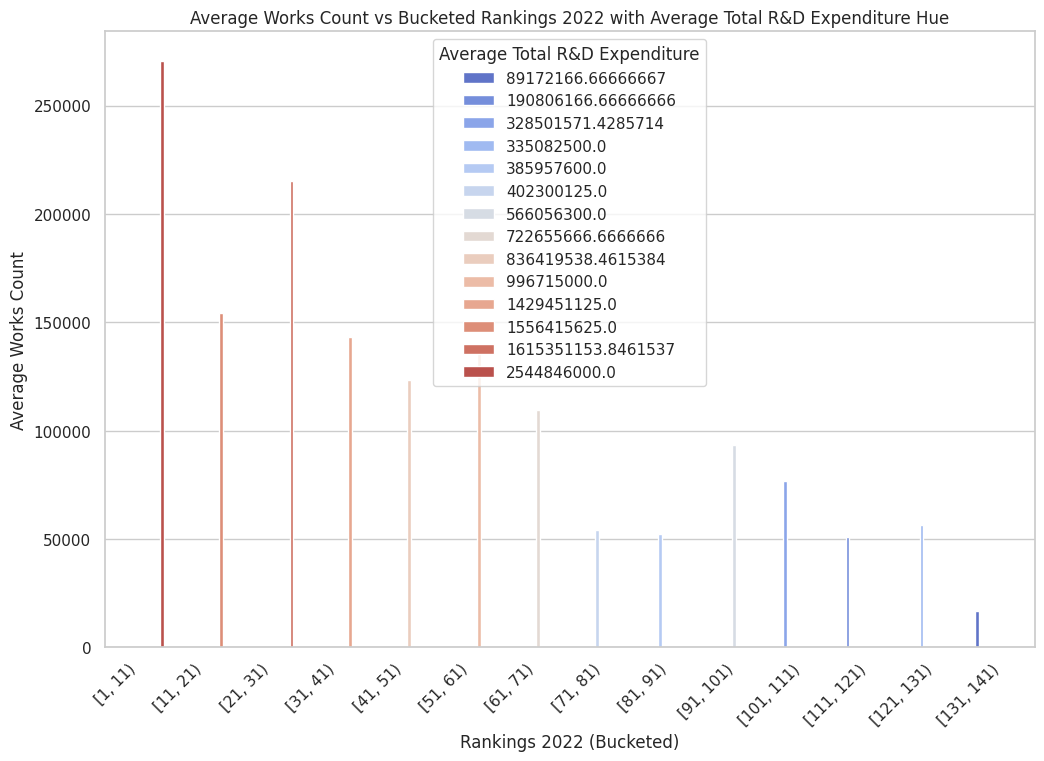

In [ ]:
# Create a bar chart of works_count vs rankings_2022
df = dropped_csv_2021_data
# Set the style for Seaborn
sns.set(style="whitegrid")


# Create buckets for rankings_2022
df['rankings_bucket'] = pd.cut(df['rankings_2022'], bins=range(1, 150, 10), right=False)

# Calculate average works_count and Total R&D Expenditure in each bucket
average_data = df.groupby('rankings_bucket').agg({
    'works_count': 'mean',
    'Total R&D Expenditure': 'mean'
}).reset_index()

# Create a bar chart with grouped rankings and hue based on Total R&D Expenditure
plt.figure(figsize=(12, 8))
sns.barplot(x="rankings_bucket", y="works_count", hue="Total R&D Expenditure", data=average_data, ci=None, palette="coolwarm")

# Set labels and title
plt.xlabel("Rankings 2022 (Bucketed)")
plt.ylabel("Average Works Count")
plt.title("Average Works Count vs Bucketed Rankings 2022 with Average Total R&D Expenditure Hue")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add legend
plt.legend(title="Average Total R&D Expenditure")

# Show the plot
plt.show()

<ipython-input-42-4b04840b788c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rankings_bucket'] = pd.cut(df['rankings_2022'], bins=range(1, 151, 10), right=False)
<ipython-input-42-4b04840b788c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalized_works_count'] = df['works_count'] / df['works_count'].max()
<ipython-input-42-4b04840b788c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

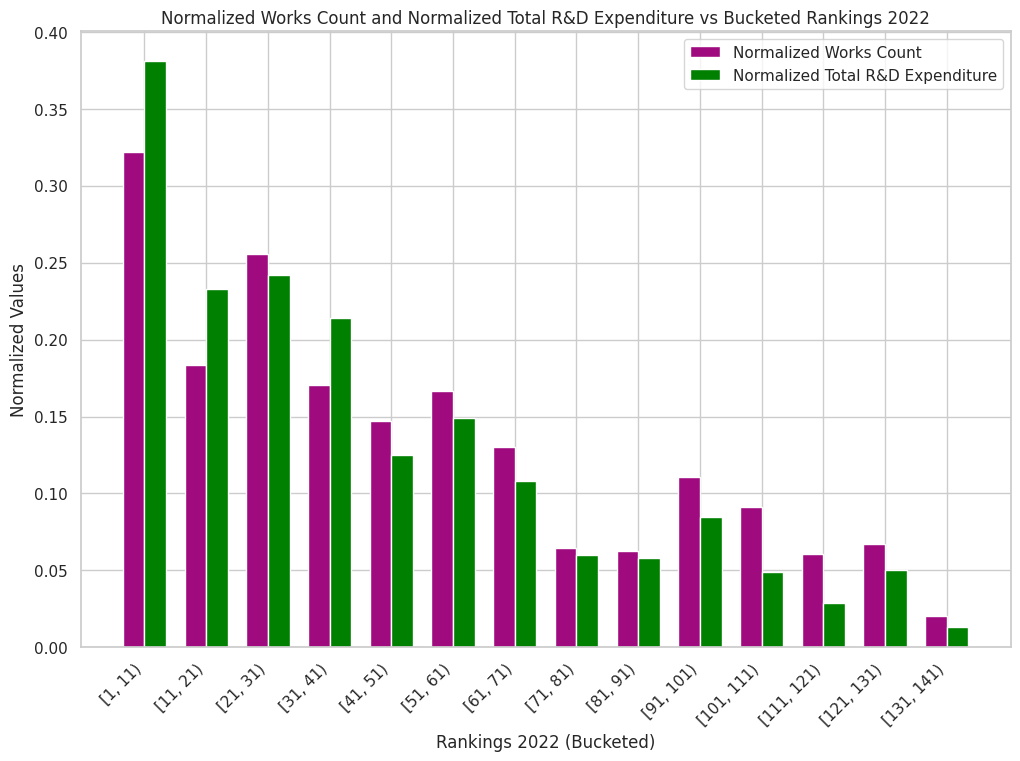

In [ ]:
# Create buckets for rankings_2022
df['rankings_bucket'] = pd.cut(df['rankings_2022'], bins=range(1, 151, 10), right=False)

# Normalize works_count and Total R&D Expenditure
df['normalized_works_count'] = df['works_count'] / df['works_count'].max()
df['normalized_total_rd_expenditure'] = df['Total R&D Expenditure'] / df['Total R&D Expenditure'].max()

# Calculate average normalized works_count and normalized Total R&D Expenditure in each bucket
average_data = df.groupby('rankings_bucket').agg({
    'normalized_works_count': 'mean',
    'normalized_total_rd_expenditure': 'mean'
}).reset_index()

# Create a grouped bar chart with separate bars for normalized works_count and normalized total_rd_expenditure
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(average_data['rankings_bucket']))

plt.bar(index, average_data['normalized_works_count'], bar_width, label='Normalized Works Count', color="#A00A7F")
plt.bar([i + bar_width for i in index], average_data['normalized_total_rd_expenditure'], bar_width, label='Normalized Total R&D Expenditure', color='green')

# Set labels and title
plt.xlabel("Rankings 2022 (Bucketed)")
plt.ylabel("Normalized Values")
plt.title("Normalized Works Count and Normalized Total R&D Expenditure vs Bucketed Rankings 2022")

# Rotate x-axis labels for better readability
plt.xticks([i + bar_width / 2 for i in index], average_data['rankings_bucket'], rotation=45, ha="right")

# Add legend
plt.legend()

# Show the plot
plt.show()


   rankings_bucket  works_count  total_rd_expenditure
0          [1, 11)     0.321775              0.381088
1         [11, 21)     0.183155              0.233072
2         [21, 31)     0.255765              0.241897
3         [31, 41)     0.170452              0.214059
4         [41, 51)     0.146837              0.125253
5         [51, 61)     0.166458              0.149257
6         [61, 71)     0.130366              0.108217
7         [71, 81)     0.064431              0.060244
8         [81, 91)     0.062433              0.057797
9        [91, 101)     0.110781              0.084766
10      [101, 111)     0.091441              0.049193
11      [111, 121)     0.060551              0.028573
12      [121, 131)     0.066966              0.050178
13      [131, 141)     0.020228              0.013353
   rankings_bucket  works_count  total_rd_expenditure
0          [1, 11)     0.321775              0.381088
1         [11, 21)     0.183155              0.233072
2         [21, 31)     0.255

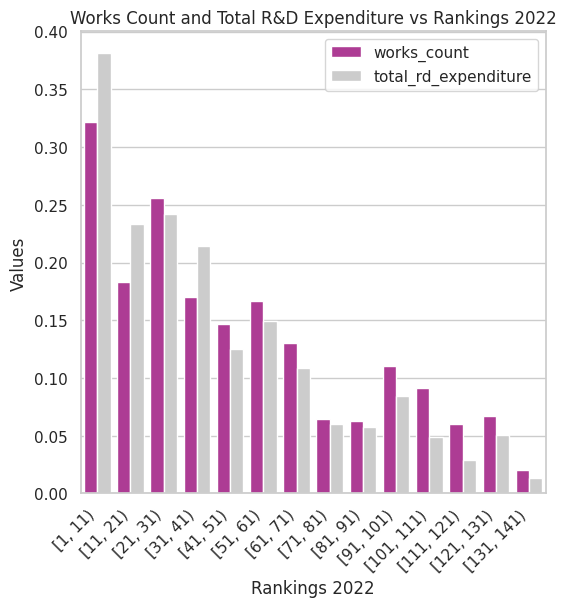

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
# sns.set(style="whitegrid")
print(average_data)
# Rename the normalized_works_count column to works_count
average_data.rename(columns={'normalized_works_count': 'works_count'}, inplace=True)
average_data.rename(columns={'normalized_total_rd_expenditure': 'total_rd_expenditure'}, inplace=True)
print(average_data)
# Melt the dataframe to long format for grouped bar chart
melted_data = pd.melt(average_data, id_vars='rankings_bucket', var_name='variable', value_name='value')
# print(melted_data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the normalized works_count and normalized total_rd_expenditure using seaborn's barplot
sns.barplot(x='rankings_bucket', y='value', hue='variable', data=melted_data, palette={"works_count": "#C0299F", "total_rd_expenditure": "#CCCCCC"})

# Set labels and title
ax.set(xlabel="Rankings 2022", ylabel="Values", title="Works Count and Total R&D Expenditure vs Rankings 2022")

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

ax.legend()
# Show the plot
plt.show()
